#### <p style="width: 500px;margin: 0 auto">Semnan University Final Machine Learning Practice 2021,Iran<br></p>
<p>
    University professor: Dr Farzin yaghmaee<br>
    TA: Amir Shokri<br>
    master student: Syed Mansour Rozati<br> 
</p>

### <P style=color:blue>Decision Tree for Divorce Predictors Data Set</p>
<a style="text-decoration:none" href="https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set">Link to divorce Data Set in UCI website</a>

Generally, logistic Machine Learning in Python has a straightforward and user-friendly implementation. It usually consists of these steps:<br>
1. Import packages, functions, and classes<br>
2. Get data to work with and, if appropriate, transform it<br>
3. Create a classification model and train (or fit) it with existing data<br>
4. Evaluate your model to see if its performance is satisfactory<br>
5. Apply your model to make predictions<br>

#### Import packages, functions, and classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score 
from sklearn import tree

#### Get data to work with and, if appropriate, transform it

In [2]:
df = pd.read_csv('divorce.csv',sep=';')
y=df.Class
x_data=df.drop(columns=['Class'])
df.head(10)

Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr46  \
0     2     2     4     1     0     0     0     0     0      0  ...      2   
1     4     4     4     4     4     0     0     4     4      4  ...      2   
2     2     2     2     2     1     3     2     1     1      2  ...      3   
3     3     2     3     2     3     3     3     3     3      3  ...      2   
4     2     2     1     1     1     1     0     0     0      0  ...      2   
5     0     0     1     0     0     2     0     0     0      1  ...      2   
6     3     3     3     2     1     3     4     3     2      2  ...      3   
7     2     1     2     2     2     1     0     3     3      2  ...      0   
8     2     2     1     0     0     4     1     3     3      3  ...      1   
9     1     1     1     1     1     2     0     2     2      2  ...      2   

   Atr47  Atr48  Atr49  Atr50  Atr51  Atr52  Atr53  Atr54  Class  
0      1      3      3      3      2      3      2      1      1  
1      2      3      4      4      4      4      2      2      1  
2      2      3      1      1      1      2      2      2      1  
3      2      3      3      3      3      2      2      2      1  
4      1      2      3      2      2      2      1      0      1  
5      2      1      2      1      1      1      2      0      1  
6      2      3      2      3      3      2      2      2      1  
7      1      2      2      2      1      1      1      0      1  
8      1      1      1      1      1      1      1      1      1  
9      0      2      2      2      2      4      3      3      1  

[10 rows x 55 columns]

#### Data exploration

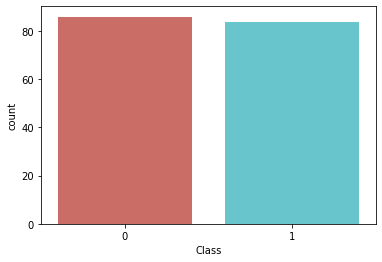

percentage of no divorce is 50.588235294117645
percentage of divorce 49.411764705882355


In [3]:
sns.countplot(x='Class',data=df,palette='hls')
plt.show()

count_no_sub = len(df[df['Class']==0])
count_sub = len(df[df['Class']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no divorce is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of divorce", pct_of_sub*100)

#### Normalize data

In [4]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x.head()

Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr45  \
0  0.50   0.5  1.00  0.25  0.00  0.00  0.00  0.00  0.00   0.00  ...   0.75   
1  1.00   1.0  1.00  1.00  1.00  0.00  0.00  1.00  1.00   1.00  ...   0.50   
2  0.50   0.5  0.50  0.50  0.25  0.75  0.50  0.25  0.25   0.50  ...   0.50   
3  0.75   0.5  0.75  0.50  0.75  0.75  0.75  0.75  0.75   0.75  ...   0.75   
4  0.50   0.5  0.25  0.25  0.25  0.25  0.00  0.00  0.00   0.00  ...   0.50   

   Atr46  Atr47  Atr48  Atr49  Atr50  Atr51  Atr52  Atr53  Atr54  
0   0.50   0.25   0.75   0.75   0.75   0.50   0.75   0.50   0.25  
1   0.50   0.50   0.75   1.00   1.00   1.00   1.00   0.50   0.50  
2   0.75   0.50   0.75   0.25   0.25   0.25   0.50   0.50   0.50  
3   0.50   0.50   0.75   0.75   0.75   0.75   0.50   0.50   0.50  
4   0.50   0.25   0.50   0.75   0.50   0.50   0.50   0.25   0.00  

[5 rows x 54 columns]

#### correlation of all atribute

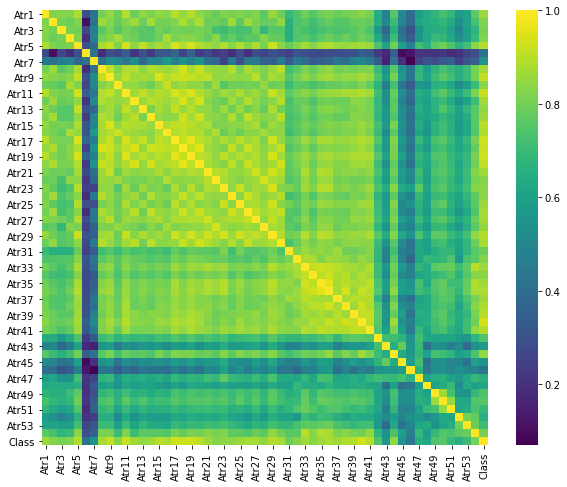

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='viridis');

#### Split data set 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state=400)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (102, 54)
x_test:  (68, 54)
y_train:  (102,)
y_test:  (68,)


#### Create a classification model and train (or fit) it with existing data

Step 1. Import the model you want to use<br>
Step 2. Make an instance of the Model<br>
Step 3. Training the model on the data, storing the information learned from the data<br>
Step 4. Predict labels for new data <br>

In [7]:
clft = DecisionTreeClassifier()
clft = clft.fit(x_train,y_train)
y_predt = clft.predict(x_test)# step 4

#### Report

In [8]:
print(classification_report(y_test, clft.predict(x_test)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clft.score(x_test, y_test)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.94      0.97      0.96        35

    accuracy                           0.96        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68

Accuracy of Decision Tree classifier on test set: 0.96


#### Draw Decistion Tree

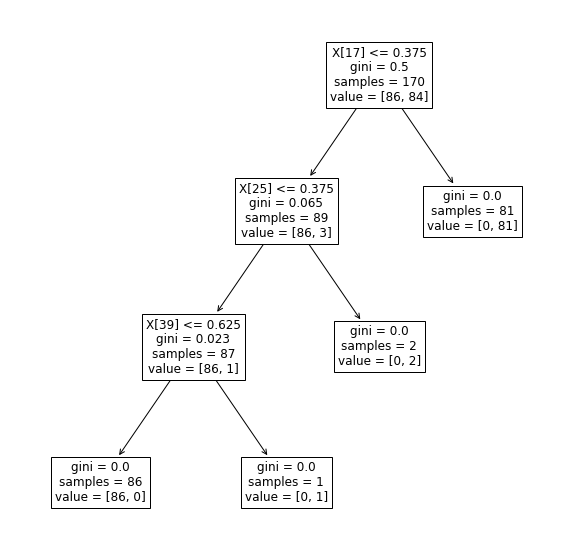

In [9]:
plt.figure(figsize=(10,10))
temp = tree.plot_tree(clft.fit(x,y), fontsize=12)
plt.show()

#### confusion matrix

<function matplotlib.pyplot.show(close=None, block=None)>

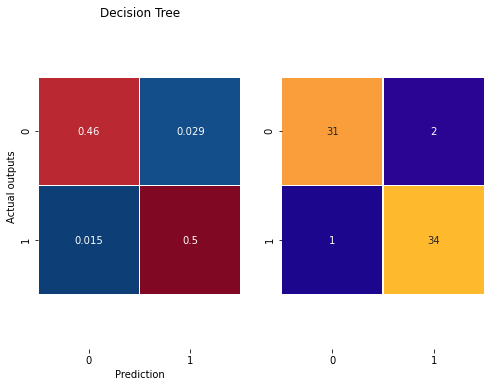

In [10]:
from sklearn.metrics import classification_report, confusion_matrix as cm
def confusionMatrix(y_pred,title,n):
    plt.subplot(1,2,n)
    ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True 
                   ,cmap='RdBu_r', vmin=0, vmax=0.52,cbar=False, linewidths=.5)
    plt.title(title)
    plt.ylabel('Actual outputs')
    plt.xlabel('Prediction')
    b, t=ax.get_ylim()
    ax.set_ylim(b+.5, t-.5)
    plt.subplot(1,2,n+1)
    axx=sns.heatmap(cm(y_test, y_pred), annot=True 
                   ,cmap='plasma', vmin=0, vmax=40,cbar=False, linewidths=.5)
    b, t=axx.get_ylim()
    axx.set_ylim(b+.5, t-.5)
    return

plt.figure(figsize=(8,6))
confusionMatrix(y_predt,'Decision Tree',1)
plt.show